선 그래프(line plot)는 연속하는 데이터 값들을 직선 또는 곡선으로 연결해 데이터값 사이의 관계를 나타낸다. 특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합하다.

<h3> 기본 사용법 </h3>

데이터 시각화에 사용할 **matplotlib.pyplot 모듈**을 임포트하고 시도 간 인구 이동 데이터셋을 가져와 데이터프레임으로 변환해보자.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)
print(df.head())

   전출지별   전입지별      1970      1971  ...      2014      2015      2016      2017
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1    전국     전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2   NaN  서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3   NaN  부산광역시    448577    389797  ...    485710    507031    459015    439073
4   NaN  대구광역시         -         -  ...    350213    351424    328228    321182

[5 rows x 50 columns]


'전출지별' 열에는 누락 데이터(NaN)가 다수 들어있다. 누락 데이터는 Excel 파일에서 병합된 셀을 데이터프레임으로 변환할 때 적절한 값을 찾지 못해 발생할 것이다. **fillna() 메소드**의 **method 매개변수**를 'ffill'로 지정하면 누락 데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채운다. 

이를 이용해 누락 데이터를 채우고 서울에서 다른 지역으로 전출(이동)하는 데이터만 추출해보자.

In [ ]:
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리한다.
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index(['전입지'], inplace = True)
print(df_seoul.head())

          1970     1971     1972     1973  ...     2014     2015     2016     2017
전입지                                        ...                                    
전국     1448985  1419016  1210559  1647268  ...  1661425  1726687  1655859  1571423
부산광역시    11568    11130    11768    16307  ...    17320    17009    15062    14484
대구광역시        -        -        -        -  ...    10062    10191     9623     8891
인천광역시        -        -        -        -  ...    43212    44915    43745    40485
광주광역시        -        -        -        -  ...     9759     9216     8354     7932

[5 rows x 48 columns]


전입지가 '경기도'인 행 데이터를 선택해보자.

In [ ]:
sr_one = df_seoul.loc['경기도']
print(sr_one.head())

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object


선 그래프를 그리려면 **plot() 함수**에 입력한 x, y축 데이터를 전달해야 한다. <br> 시리즈의 인덱스를 x축, 데이터 값을 y축 데이터로 plot() 함수에 전달해보자.

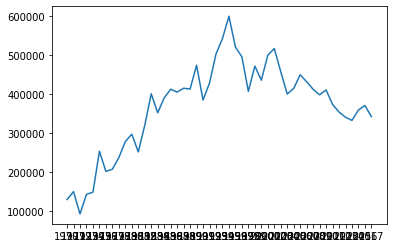

In [ ]:
plt.plot(sr_one.index, sr_one.values)

시리즈 또는 데이터프레임 객체를 plot() 함수로 직접 입력하는 것도 가능하다. <br> sr_one 시리즈 객체를 plot() 함수에 전달하면 위와 동일한 결과가 출력된다.

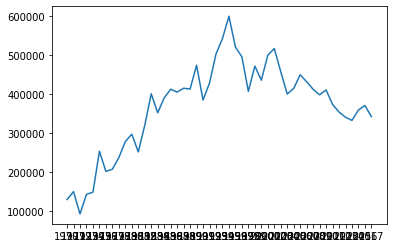

In [ ]:
plt.plot(sr_one)

<h3> 차트 제목, 축 이름 추가 </h3>

그래프 객체에 차트 제목을 추가할 때는 **title() 함수**를 사용한다. x축 이름은 **xlabel() 함수**, y축 이름은 **ylabel() 함수**를 사용한다.

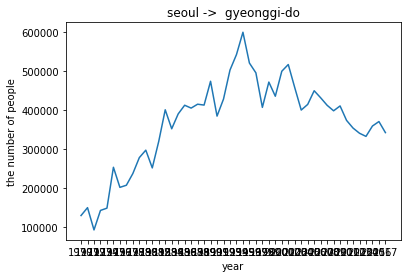

In [ ]:
plt.plot(sr_one.index, sr_one.values)
plt.title('seoul ->  gyeonggi-do')
plt.xlabel('year')
plt.ylabel('the number of people')
plt.show()

<h3> Matplotlib 한글 폰트 오류 해결 </h3>

제목을 한글로 지정하게되면 글자가 깨지는 현상이 발생한다. 이는 **Matplotlib이 한글 폰트를 지원하지 않기 때문에 발생하는 문제**이다. 오류를 해결하려면 Matplotlib을 사용하는 파이썬 프로그램 앞에 한글 폰트를 지정하는 코드를 추가해주면 된다.

* 실행했는데 정상적으로 작동하지 않는다. 이는 추후에 해결해보기로하자.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

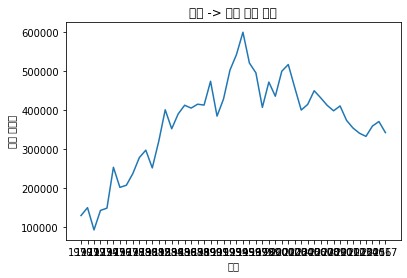

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# Excel 파일을 데이터프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 누락된 데이터 앞 데이터로 체우기
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역이로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop('전출지별', axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index(['전입지'], inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 변경사항 저장하고 그래프 출력
plt.show()

<h3> 그래프 꾸미기 </h3>

x축 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제를 해결해보자. 이는 눈금 라벨이 들어갈 만한 충분한 여유 공간이 없어서 발생하는 문제이다.

이를 해결하기 위해 두 가지 방법을 사용해보자.

* **figure() 함수**로 그림틀의 가로 사이즈를 더 크게 설정한다.
* **xticks()** 함수로 x축 눈금 라벨을 반시계 방향으로 90도 회전시킨다.

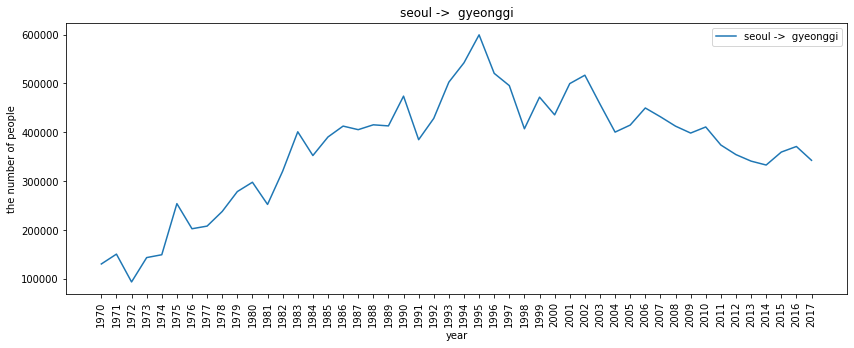

In [ ]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전
plt.xticks(rotation = 'vertical')

plt.plot(sr_one.index, sr_one.values)

plt.title('seoul ->  gyeonggi')
plt.xlabel('year')
plt.ylabel('the number of people')

plt.legend(labels = ['seoul ->  gyeonggi'], loc = 'best')

plt.show()

x축 눈금 라벨이 겹치지 않고 잘 표시되었다. 글씨를 회전하기 위해 사용한 <br> **rotation매개변수**에 'vertical' 대신 90과 같이 각도를 나타내는 숫자를 입력해도 된다.

Matplotlib의 스타일 서식 지정에 대해 알아보자. <br>
색, 폰트 등 디자인적 요소를 사전에 지정된 스타일로 빠르게 일괄 변경한다. 단. 스타일 서식을 지정하는 것은 Matplotlib 실행 환경 설정을 변경하는 것으로 이후 셀에도 그대로 적용된다. <br>
'ggplot' 이라는 스타일 서식을 지정해보자.

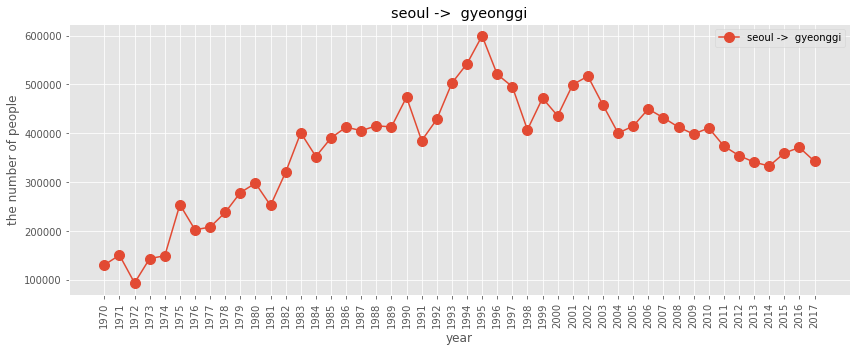

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전
plt.xticks(size = 10, rotation = 'vertical')

plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10)

plt.title('seoul ->  gyeonggi')
plt.xlabel('year')
plt.ylabel('the number of people')

plt.legend(labels = ['seoul ->  gyeonggi'], loc = 'best')

plt.show()

'ggplot' 외에도 많은 스타일 서식이 지원된다. <br>
아래와 같이 현재 실행환경에서 사용 가능한 스타일 옵션을 확인할 수 있다.

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


그래프에 주석을 붙이기 위해서는 **annotate() 함수**를 사용한다. 주석 내용을 넣을 위치와 정렬 방법 등을 annotate() 함수에 전달한다. <br>
**arrowprops 옵션**을 사용하면 텍스트 대신 화살표가 표시된다. 화살표 스타일, 시작점과 끝점의 좌표를 입력해야 한다. <br>
annotate() 함수의 **rotation 옵션**에서 양(+)의 회전 방향은 반시계방향이다. 글자를 세로 방향으로 정렬하는 **va 매개변수**는 'center', 'top', 'bottom', 'baseline'으로 지정할 수 있다. 가로 방향은 **ha 매개변수**로 'center', 'left', 'right'로 지정할 수 있다.


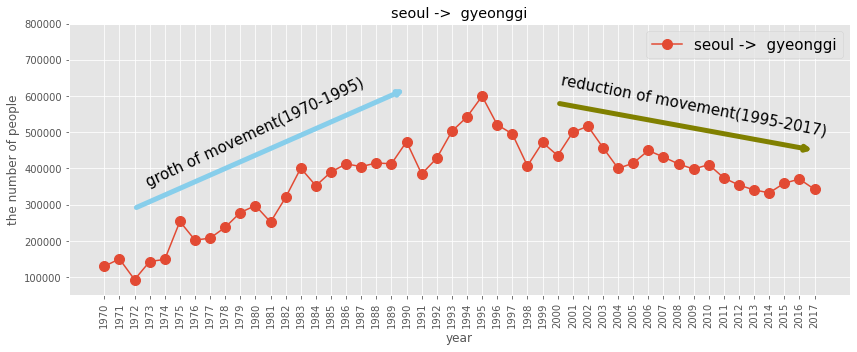

In [ ]:
# 그림 사이즈 지정
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전
plt.xticks(size = 10, rotation = 'vertical')

plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10)

plt.title('seoul ->  gyeonggi')
plt.xlabel('year')
plt.ylabel('the number of people')

plt.legend(labels = ['seoul ->  gyeonggi'], loc = 'best', fontsize = 15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle = '->', color = 'skyblue', lw = 5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle = '->', color = 'olive', lw = 5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('groth of movement(1970-1995)',  #텍스트 입력
             xy=(10, 350000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('reduction of movement(1995-2017)',  #텍스트 입력
             xy=(39, 490000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()  # 변경사항 저장하고 그래프 출력

<h3> 화면 분할하여 그래프 여러 개 그리기</h3>

화면을 분할해 여러 개의 **axe 객체**를 만들면 분할된 하면마다 axe 객체를 하나씩 배정해 여러 그래프를 그릴 수 있다.<br>
**figure() 함수**를 사용하면 그래프를 그리는 그림틀을 만든다. **figsize 매개변수**로 가로, 세로 크기를 지정한다. <br>
후 fig 객체에 **add_subplot() 메소드**를 적용하여 그림틀을 여러 개로 분할할 수 있다. 이때 나눠진 각 부분을 axe 객체라고 부른다. add_subplot() 메소드의 인자에 "행 크기, 열 크기, 서브플롯 순서"를 순서대로 입력하면 axe 객체를 배정할 수 있다. <br>
이후 axe객체에 plot() 메소드를 적용해 그래프를 출력할 수 있다. 

* **set_ylim()**: y축의 최소값, 최대값 한계를 설정할 수 있다.
* **set_xticklabels()**: 글자를 회전시킬 수 있다.

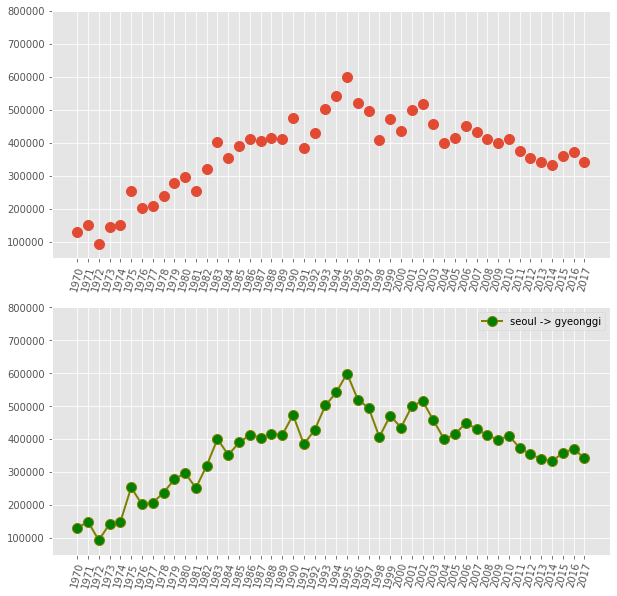

In [ ]:
# 그래프 객체 생성(figure에 2개의 서브플롯 생성)
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10, color = 'olive', linewidth = 2, label = 'seoul -> gyeonggi')
ax2.legend(loc = 'best')

# y축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

# 변경사항 저장후 출력
plt.show()

선 그래프 꾸미기 옵션 정리
* 'o': 선 그래프가 아니라 점 그래프로 표현한다.
* marker = 'o': 마커 모양을 지정한다. (예: 'o', '+', '*', '.')
* markerfacecolor = 'green': 마커 배경색을 지정한다.
* markersize = 10: 마커 크기를 지정한다.
* color = 'olive': 선의 색을 지정한다.
* linewidth = 2: 선의 굵기를 지정한다.
* label = 'seoul -> gyeonggi': 라벨을 지정한다.

**set_title() 메소드**를 적용하면 제목을 추가할 수 있다. x축 이름은 **set_xlabel() 메소드**, y축 이름은 **set_ylabel() 메소드**로 지정할 수 있다.

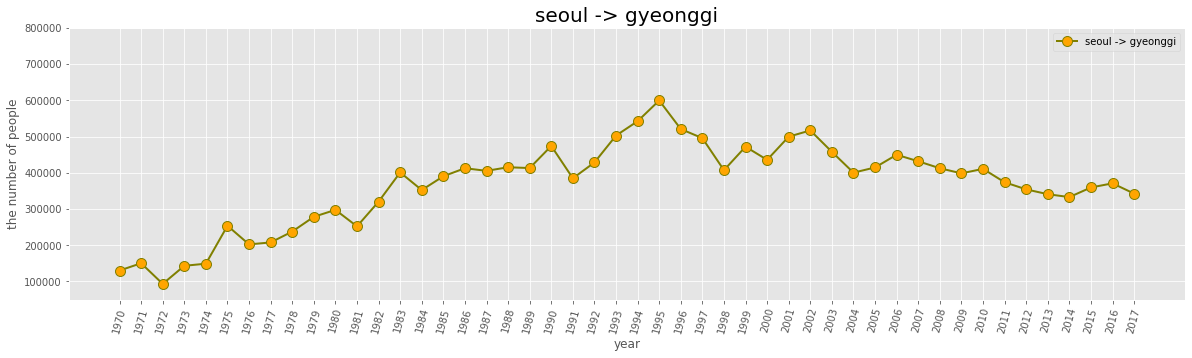

In [ ]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10, color = 'olive', linewidth = 2, label = 'seoul -> gyeonggi')
ax.legend(loc = 'best')

ax.set_ylim(50000, 800000)

ax.set_title('seoul -> gyeonggi', size = 20)

ax.set_xlabel('year', size = 12)
ax.set_ylabel('the number of people')

ax.set_xticklabels(sr_one.index, rotation = 75)

ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show()

동일한 그림에 여러 그래프를 추가할 수도 있다. 하나의 axe 객체에 여러 번 plot() 메소드를 적용하면 된다.

In [ ]:
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도']]

print(df_3)

       1970   1971   1972   1973   1974  ...   2013   2014   2015   2016   2017
전입지                                      ...                                   
충청남도  15954  18943  23406  27139  25509  ...  21486  21473  22299  21741  21020
경상북도  11868  16459  22073  27531  26902  ...  14420  14456  15113  14236  12464
강원도    9352  12885  13561  16481  15479  ...  20601  21173  22659  21590  21016

[3 rows x 48 columns]


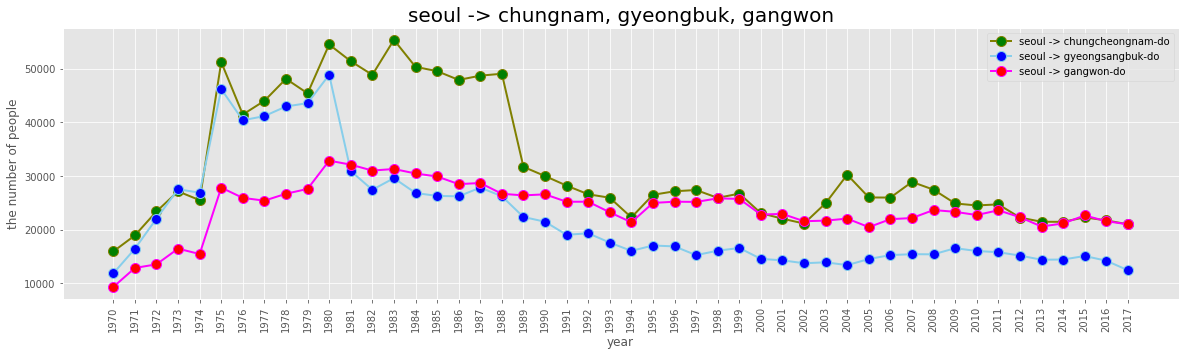

In [ ]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_3.loc['충청남도'], marker = 'o', markerfacecolor = 'green', markersize = 10, color = 'olive', linewidth = 2, label = 'seoul -> chungcheongnam-do')
ax.plot(df_3.loc['경상북도'], marker = 'o', markerfacecolor = 'blue', markersize = 10, color = 'skyblue', linewidth = 2, label = 'seoul -> gyeongsangbuk-do')
ax.plot(df_3.loc['강원도'], marker = 'o', markerfacecolor = 'red', markersize = 10, color = 'magenta', linewidth = 2, label = 'seoul -> gangwon-do')

ax.legend(loc = 'best')

ax.set_title('seoul -> chungnam, gyeongbuk, gangwon', size = 20) 

ax.set_xlabel('year')
ax.set_ylabel('the number of people')

ax.set_xticklabels(df_3.columns, rotation = 90)

ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show()

이번에는 4개의 그래프를 한 곳에 그려보자.

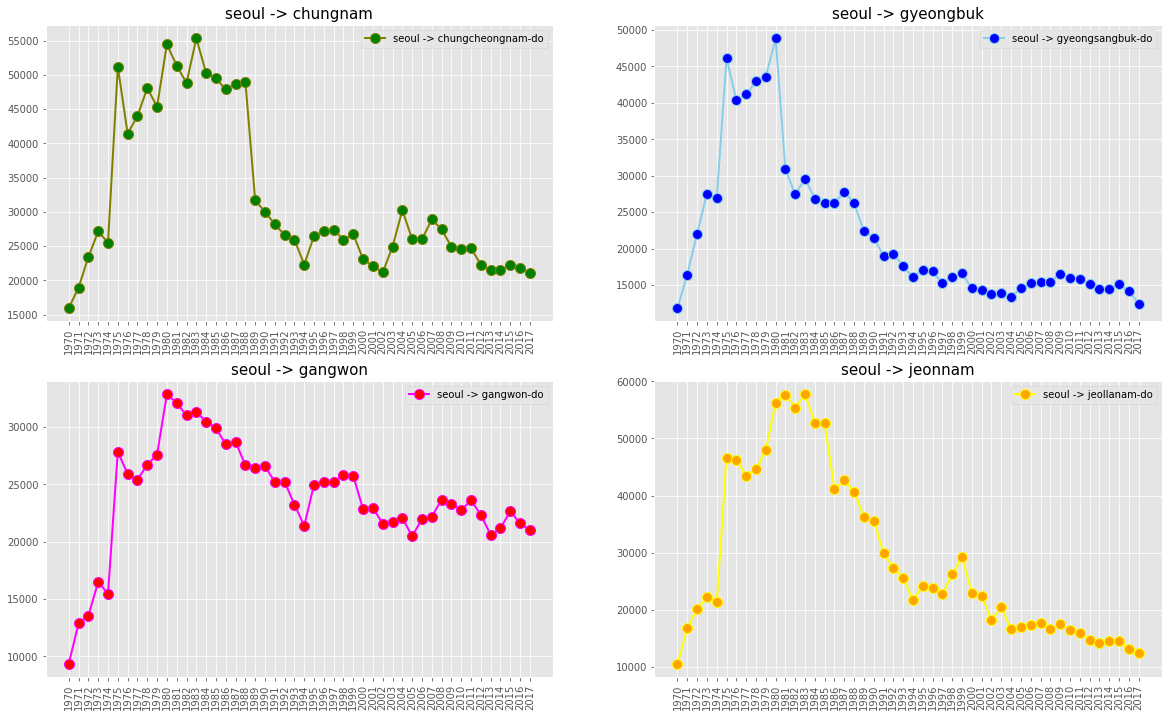

In [ ]:
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도']]

plt.style.use('ggplot')

fig = plt.figure(figsize = (20, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(df_4.loc['충청남도'], marker = 'o', markerfacecolor = 'green', markersize = 10, color = 'olive', linewidth = 2, label = 'seoul -> chungcheongnam-do')
ax2.plot(df_4.loc['경상북도'], marker = 'o', markerfacecolor = 'blue', markersize = 10, color = 'skyblue', linewidth = 2, label = 'seoul -> gyeongsangbuk-do')
ax3.plot(df_4.loc['강원도'], marker = 'o', markerfacecolor = 'red', markersize = 10, color = 'magenta', linewidth = 2, label = 'seoul -> gangwon-do')
ax4.plot(df_4.loc['전라남도'], marker = 'o', markerfacecolor = 'orange', markersize = 10, color = 'yellow', linewidth = 2, label = 'seoul -> jeollanam-do')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

ax1.set_title('seoul -> chungnam', size = 15)
ax2.set_title('seoul -> gyeongbuk', size = 15)
ax3.set_title('seoul -> gangwon', size = 15)
ax4.set_title('seoul -> jeonnam', size = 15)

ax1.set_xticklabels(df_4.columns, rotation = 90)
ax2.set_xticklabels(df_4.columns, rotation = 90)
ax3.set_xticklabels(df_4.columns, rotation = 90)
ax4.set_xticklabels(df_4.columns, rotation = 90)

plt.show()

<h3> Matplotlib에서 사용할 수 있는 색의 종류 </h3>

Matplotlib 라이브러리를 사용할 때 색상을 지정하는 경우가 많은데 이럴 때 사용할 수 있는 색상의 종류를 확인할 수 있다면 매우 유용하다. <br>
아래와 같이 색상의 종류를 확인해 볼 수 있다.

In [ ]:
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리를 만든다.
colors = {}

# 컬러 이름과 헥사코드를 확인하여 딕셔너리에 입력한다.
for name, hex in matplotlib.colors.cnames.items():
  colors[name] = hex

print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'